# Imports

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
import itertools
import time

plt.rcParams['image.cmap'] = 'gray'

resolution = '5.1.13.tiff'
ariel = '5.1.10.tiff'
airplane = '5.1.11.tiff'
APC = '7.1.08.tiff'
left = 'left.png'
right = 'right.png'

# Question 1: Unit norm ball

In [ ]:
def norm(x1, x2, p):
  # result = (x1 ** p + x2 ** p) ** (1/p)
  x1 = np.abs(x1)
  x2 = np.abs(x2)
  result = np.power((np.power(x1, p) + np.power(x2, p)), (1/p))
  return result

# function to 
def getX2(x1, p):
  abs_x1 = np.abs(x1)
  result = 1 - np.power(abs_x1, p)
  result = np.power(result, (1/p))
  return result

In [ ]:
# plot the boundary of the unit norm ball
def unitNormBallBoundary(p):
  x1 = np.linspace(-1, 1, num=1000)
  x2 = getX2(x1, p)

  # extending the set of points for both positive and negative p
  x1 = np.r_[x1, x1]
  x2 = np.r_[x2, (-1) * x2]
  return x1, x2

# plot the unit norm ball
def unitNormBall(p):
  coordinates = np.linspace(-1, 1, num=500)
  # get all possible pairs of coordinates
  # pairs = np.array(list(itertools.product(coordinates, coordinates)))
  pairs = np.transpose([np.tile(coordinates, len(coordinates)), np.repeat(coordinates, len(coordinates))])
  x1 = pairs.T[0]
  x2 = pairs.T[1]

  # calculate norm for all pairs
  norms = norm(x1, x2, p)
  # get indices where the norm <= 1
  indices = np.where(norms <= 1)
  # update x1 and x2
  x1 = np.array(x1[indices])
  x2 = np.array(x2[indices])

  return x1, x2

### Norm ball for 0 < p < 1
Plotting the unit norm balls and their boundaries

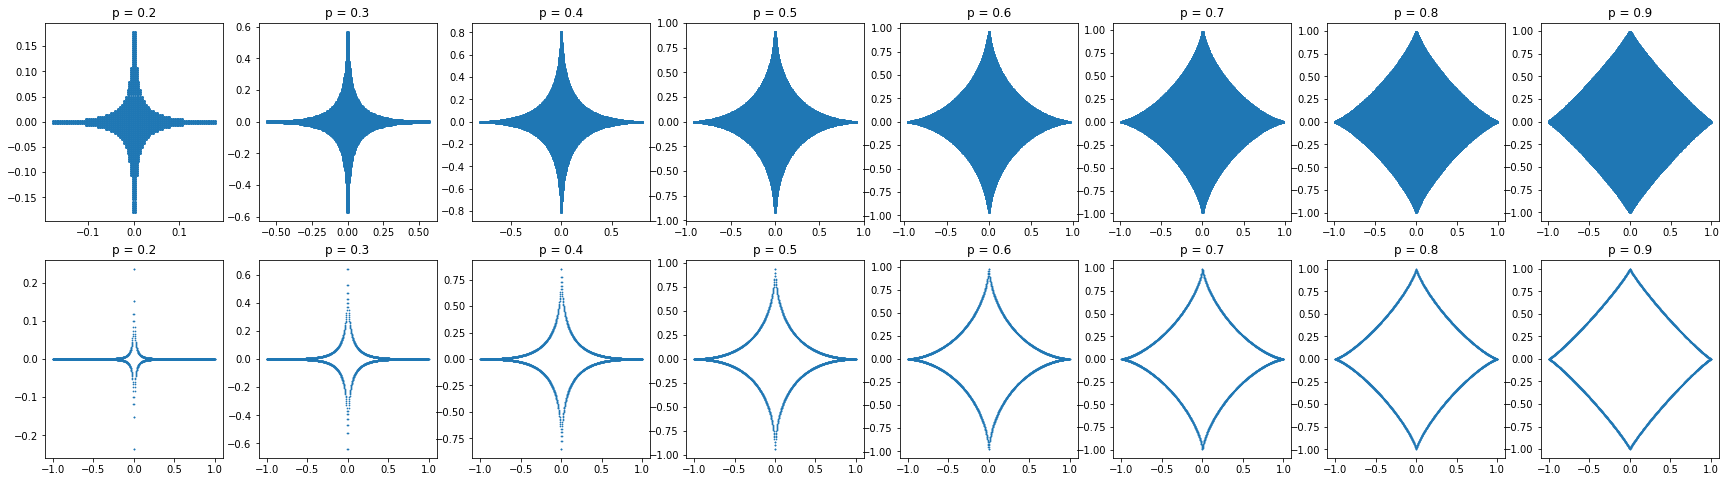

In [ ]:
p = np.linspace(0.2, 1, 8, endpoint=False)
fig, axis = plt.subplots(2, 8, figsize=(30, 8))
for i in range(p.shape[0]):
    x1, x2 = unitNormBall(p[i])
    axis[0][i].scatter(x1, x2, s=4)
    axis[0][i].set_title("p = " + str(round(p[i], 1)))

    x1, x2 = unitNormBallBoundary(p[i])
    axis[1][i].scatter(x1, x2, s=0.5)
    axis[1][i].set_title("p = " + str(round(p[i], 1)))


### Norm ball for p >= 1
Plotting the unit norm balls and their boundaries

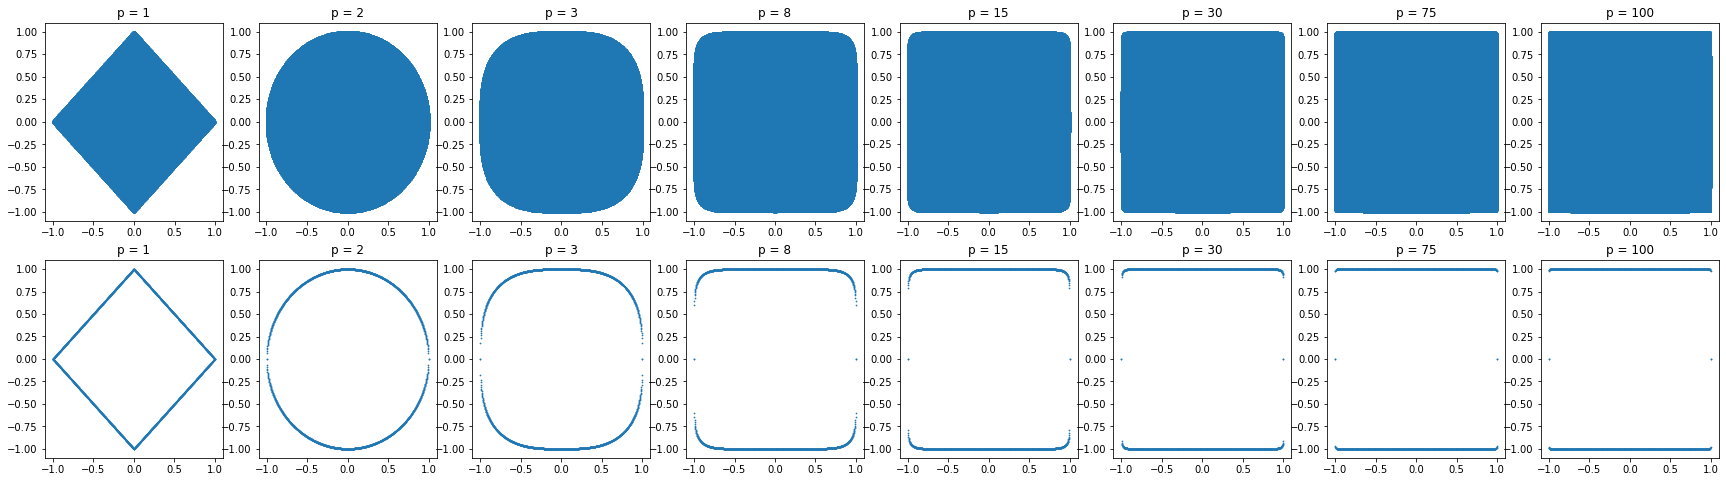

In [ ]:
# p = np.linspace(0.2, 1, 8, endpoint=False)
p = np.array([1, 2, 3, 8, 15, 30, 75, 100])
fig, axis = plt.subplots(2, 8, figsize=(30, 8))
for i in range(p.shape[0]):
    x1, x2 = unitNormBall(p[i])
    axis[0][i].scatter(x1, x2, s=4)
    axis[0][i].set_title("p = " + str(round(p[i], 1)))

    x1, x2 = unitNormBallBoundary(p[i])
    axis[1][i].scatter(x1, x2, s=0.5)
    axis[1][i].set_title("p = " + str(round(p[i], 1)))


## Observations

When p >= 1, the unit norm ball plots are convex. When 0 < p < 1, the plots are concave because the absolute values of the coordinates are all lesser than 1, which means while raising them to the p-root power increases their value as the coordinate value increases.

# Question 2: Completeness

In [ ]:
# chosen function:
# f_n(x) = 1 / (e^(n(2x - 1)) + 1)
def function(x, n):
  return 1 / (np.exp(n * (2 * x - 1)) + 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


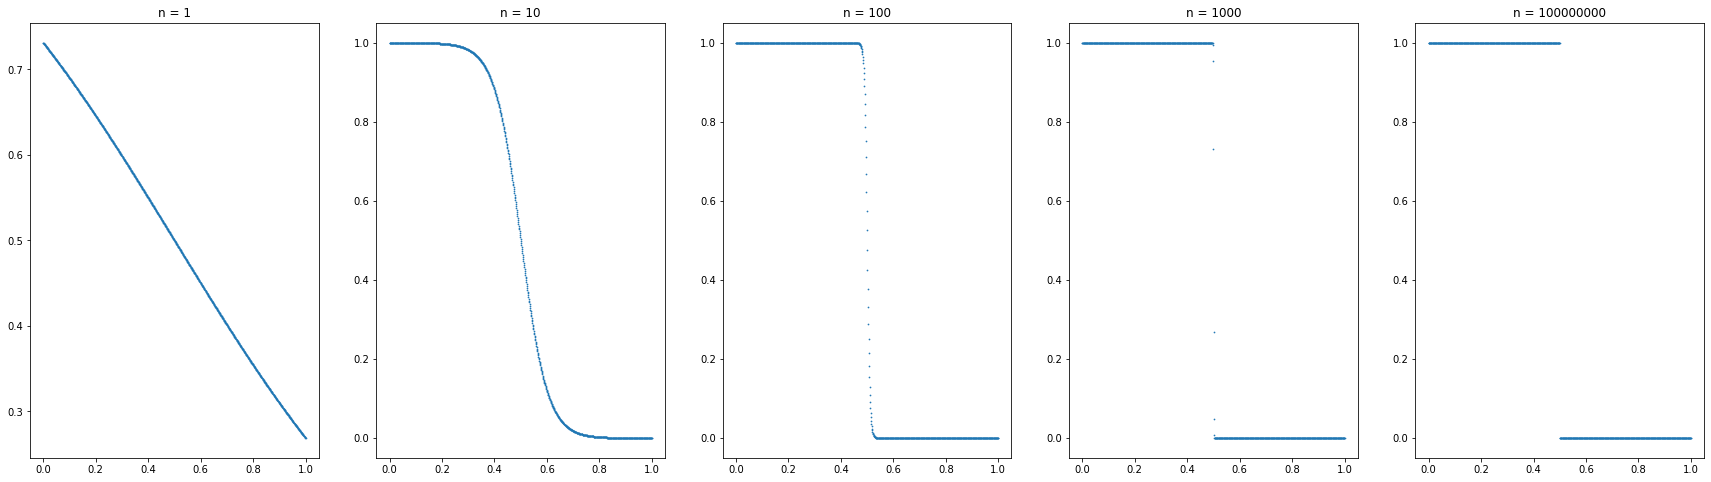

In [ ]:
x = np.linspace(0, 1, 1000)
n = np.array([1, 10, 100, 1000, 100000000])

fig, axis = plt.subplots(1, n.shape[0], figsize=(30, 8))
f = np.zeros(n.shape[0])
for i in range(n.shape[0]):
  y = function(x, n[i])

  axis[i].scatter(x, y, s=0.5)
  axis[i].set_title("n = " + str(n[i]))

Clearly, for larger values of n, the sequence doesn't tend to a unique value, hence this space is incomplete.

# Question 3: Entropy of a discrete RV

## (a)

In [ ]:
def Entropy(PMF):
  if round(PMF.sum()) != 1:
    return "Invalid"
  
  non_zero_p = PMF[np.where(PMF != 0)]
  results = non_zero_p * np.log2(non_zero_p)
  results = -1 * results.sum()

  return results

In [ ]:
def Bern(X, p):
  results = np.zeros(X.shape)
  for i in range(X.shape[0]):
    if X[i] == 0 or X[i] == 1:
      results[i] = (p ** X[i]) * ((1 - p) ** (1 - X[i])) 

  return results

## (b)

p where entropy is max: [0.5]


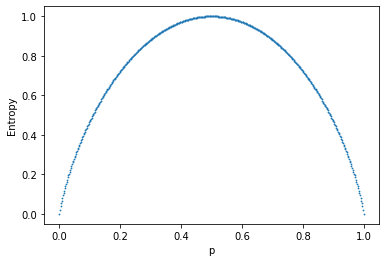

In [ ]:
p = np.linspace(0, 1, 501)
X = np.array([0, 1]) # possible values of X

flag = 0
entropies = np.zeros(p.shape)
for i in range(entropies.shape[0]):
  pmf = Bern(X, p[i])
  temp = Entropy(pmf)
  if temp == "Invalid":
    flag = -1
    break
  entropies[i] = temp

max_e = np.amax(entropies)
print("p where entropy is max:", p[np.where(entropies == max_e)])
if flag == 0:
  plt.scatter(p, entropies, s=0.6)
  plt.xlabel("p")
  plt.ylabel('Entropy')
  plt.show()
else:
  print("Invalid values provided.")

This plot attains its maximum value when p = 0.5.


 <!-- since the array X has a 50/50 split of 0's and 1's. If we were to change the distribution of the array X, the max value of p would also change accordingly. -->

# Question 4: Image Entropy

## (a)

In [ ]:
def normHistogram(fileName):
  I = mpimg.imread(fileName)
  if fileName == "left.png" or fileName == "right.png":
    I = I * 255
  frequencies = np.zeros(256)

  for i in range(256):
    frequencies[i] = np.count_nonzero(I == i)

  pixels = np.ones(I.shape).sum()
  normHist = frequencies / pixels

  return normHist

## (b)

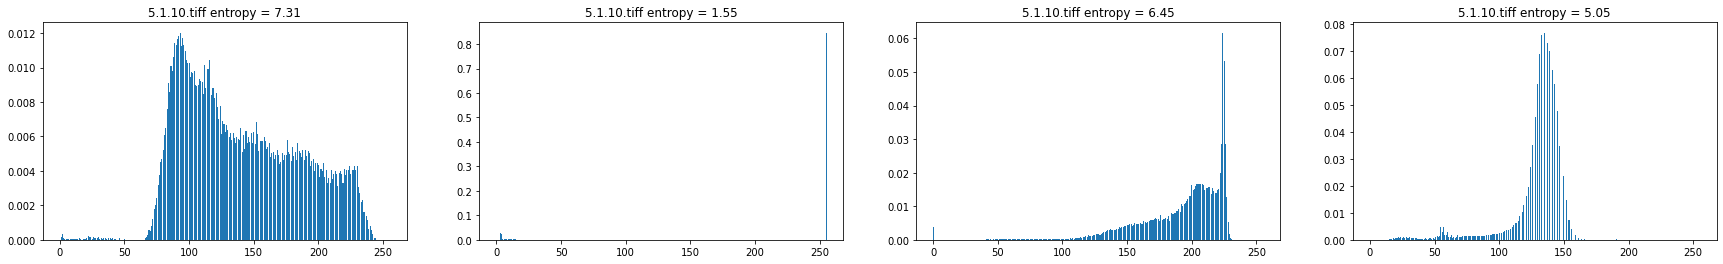

In [ ]:
images = [ariel, resolution, airplane, APC]

fig, axis = plt.subplots(1, len(images), figsize=(30, 4))

for i in range(len(images)):
  normHist = normHistogram(images[i])
  imageEntropy = Entropy(normHist)
  x_axis = np.arange(256)
  axis[i].bar(x_axis, normHist)
  axis[i].set_title(str(ariel) + " entropy = " + str(round(imageEntropy, 2)))

As expected, images with a large and varying normalised histogram have larger entropies than images with much fewer and varying frequencies.

# Question 5: Joint PMF and joint entropy

## (a)

110592.0


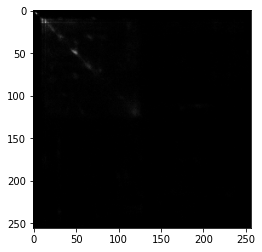

In [ ]:
def jointHistogram(img1, img2):
  I1 = mpimg.imread(img1) * 255
  I2 = mpimg.imread(img2) * 255

  frequencies = np.zeros((256, 256))

  for i in range(I1.shape[0]):
    for j in range(I1.shape[1]):
      frequencies[int(I1[i][j])][int(I2[i][j])] += 1

  pixels = np.ones(I1.shape).sum()
  print(pixels)

  jointHist = frequencies / pixels
  plt.imshow(jointHist)

  return jointHist

jointHist = jointHistogram(left, right)

## (b)

In [ ]:
def jointEntropy(jointPMF):
  logMatrix = np.zeros(jointPMF.shape)
  non_zeros = np.where(jointPMF != 0)
  logMatrix[non_zeros] = np.log2(1 / jointPMF[non_zeros])
  entropy = (jointPMF * logMatrix).sum()
  return entropy

## (c)

In [ ]:
entropy = jointEntropy(jointHist)
print("Joint entropy:", entropy)

Joint entropy: 13.675203263382306


# Question 6: Conditional PMF and conditional entropy

## (a)

In [ ]:
#  p(X|Y = y): here index = 1, and value = y
#  p(Y|X = x): here index = 0, and value = x
def conditionalPMF(jointPMF, index, value):

  if index == 1:
    pixelVals = jointPMF[:, value]
  elif index == 0:
    pixelVals = jointPMF[value, :]

  p = pixelVals.sum()
  if p == 0:
    return np.zeros(pixelVals.shape)
  conditionalP = pixelVals/p
  return conditionalP

temp = conditionalPMF(jointHist, 1, 8)

## (b)

In [ ]:
#  H(X|Y): here index = 1
#  H(Y|X): here index = 0
def conditionalEntropy(jointPMF, index):

  entropy = 0
  for i in range(256):
    condP = conditionalPMF(jointPMF, index, i)
    if condP.sum() == 0:
      continue
    H = Entropy(condP)

    if index == 1:
      pixelVals = jointPMF[:, i]
    elif index == 0:
      pixelVals = jointPMF[i, :]

    p = pixelVals.sum()
    entropy = entropy + p * H

  return entropy

## (c)

In [ ]:
condEntropy = conditionalEntropy(jointHist, 1)
print("H(X|Y) =", condEntropy)
condEntropy = conditionalEntropy(jointHist, 0)
print("H(Y|X) =", condEntropy)

H(X|Y) = 6.396577731686181
H(Y|X) = 6.416909158632363


## Question 7: KL divergence

## (a)

In [ ]:
def KL(p, q):
  nonzeros = np.where(q != 0)

  # keeping only the non zero terms
  p = p[nonzeros]
  q = q[nonzeros]

  likelihoods = p / q
  likelihoods = likelihoods[np.where(likelihoods != 0)]
  likelihoods = np.log2(likelihoods)
  D = (p * likelihoods).sum()
  return D

## (b)

In [ ]:
r = 0.5
s = np.linspace(0.2, 1, 50, endpoint=False)
X = np.array([0, 1])

### i.

In [ ]:
p = Bern(X, r)
fig, axs = plt.subplots(1, 2)
D_pq = np.zeros(s.shape)
D_qp = np.zeros(s.shape)

for i in range(s.shape[0]):
  q = Bern(X, s[i])
  D_pq[i] = KL(p, q)
  D_qp[i] = KL(q, p)

axs[0].scatter(s, D_pq)
axs[0].set_title("D(p||q) vs s for r = " + str(r))

axs[1].scatter(s, D_qp)
axs[1].set_title("D(q||p) vs s for r = " + str(r))

### ii.

The code block below verifies that there are no negative values in the divergence arrays.

In [ ]:
nonzero_pq = np.count_nonzero(D_pq < 0)
nonzero_qp = np.count_nonzero(D_qp < 0)

print("Negative values in D(p||q):", nonzero_pq)
print("Negative values in D(q||p):", nonzero_qp)

Negative values in D(p||q): 0
Negative values in D(q||p): 0


### iii.

In [ ]:
equality = np.count_nonzero(D_pq == D_qp)
print("Number of times where D(p||q) = D(q||p):", equality)

# calculating D when r = s
p = Bern(X, 0.2)
q = Bern(X, 0.2)
D1 = KL(p, q)
D2 = KL(q, p)

print("D(p||q) =", D1)
print("D(q||p) =", D2)

Number of times where D(p||q) = D(q||p): 0
D(p||q) = 0.0
D(q||p) = 0.0


### iv.

In [ ]:
p = normHistogram(left)
q = normHistogram(right)

D1 = KL(p, q)
D2 = KL(q, p)

print("D(p||q) =", D1)
print("D(q||p) =", D2)

D(p||q) = 0.015104015237387055
D(q||p) = 0.01440978583335448


The KL divergence is a good metric for image similarity since it essentially tells us how different two sets of probabilities are, and when passed the PMF values of two images, it tells us how different they are from each other. Thus, the more similar the images, the smaller is the value of D(p||q).